<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/12-ensemble-learning/01_bagging_model_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bagging model: Random forest

In this notebook, we see one of the most well-known bagging models: a **random forest**. 

In a random
forest, the weak learners are small decision trees trained on random subsets of the dataset.

Random forests work well for classification and regression problems, and the process is similar.

##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_12_Ensemble_Methods/utils.py

In [17]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import utils

random.seed(0)

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

##Dataset

We use a small dataset of spam and ham emails.

In [5]:
emails = np.array([
  [7,8,1],
  [3,2,0],
  [8,4,1],
  [2,6,0],
  [6,5,1],
  [9,6,1],
  [8,5,0],
  [7,1,0],
  [1,9,1],
  [4,7,0],
  [1,3,0],
  [3,10,1],
  [2,2,1],
  [9,3,0],
  [5,3,0],
  [10,1,0],
  [5,9,1],
  [10,8,1]
])

spam_dataset = pd.DataFrame(emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


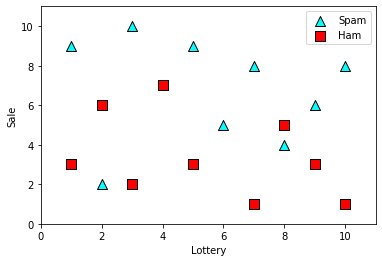

In [6]:
features = spam_dataset[["Lottery", "Sale"]]
labels = spam_dataset["Spam"]

utils.plot_points(features, labels)

##Training Decision Tree

Before we get into random forests, let’s fit a decision tree classifier to this data and see how
well it performs.

In [7]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

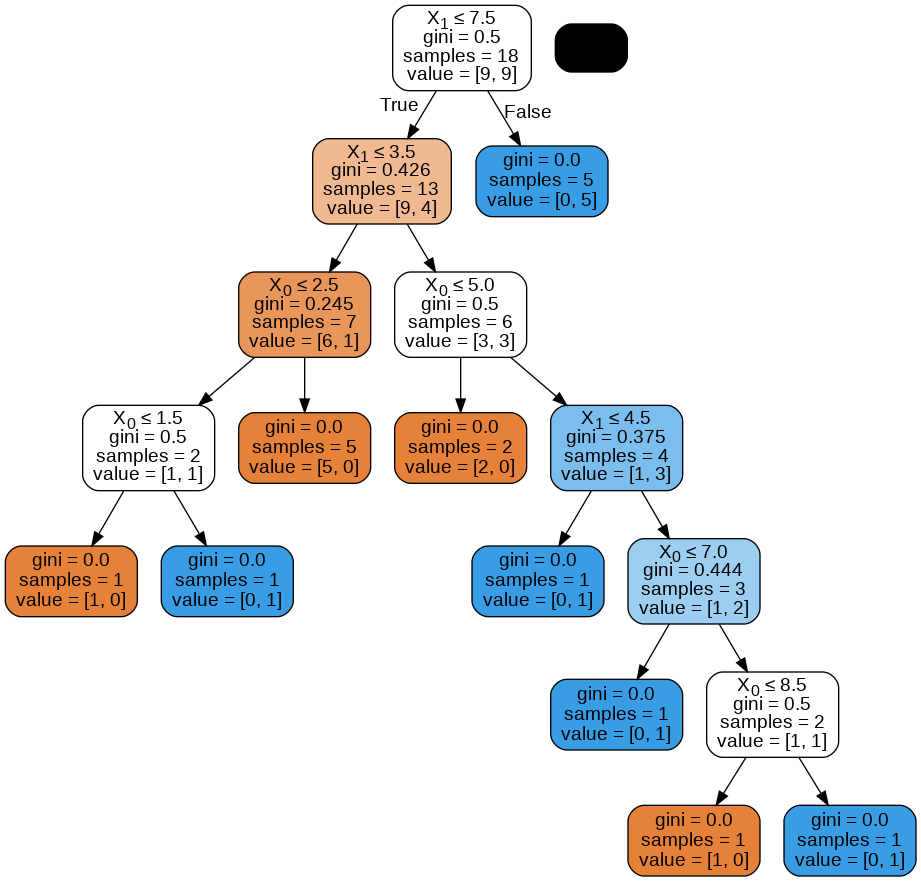

In [8]:
utils.display_tree(decision_tree_classifier)

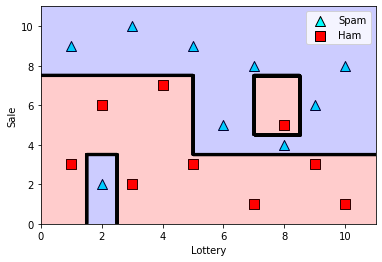

In [9]:
utils.plot_model(features, labels, decision_tree_classifier)

Notice that it fits the dataset very well, with a 100% training accuracy, although it clearly overfits. 

The overfitting can be noticed on the two outliers that the model tries to classify correctly, without
noticing they are outliers.

Let's see how to solve this overfitting problem by fitting a random forest.

##Training  Random Forest manually

Let's learn how to fit a random forest manually.

In a nutshell, we pick random
subsets from our dataset and train a weak learner (decision tree) on each one of them. Some data
points may belong to several subsets, and others may belong to none. 

The combination of them is our strong learner. The way the strong learner makes predictions is by letting the weak learners
vote.

For this dataset, we use three weak learners. 

Because the dataset has 18 points, let’s consider
three subsets of 6 data points each.

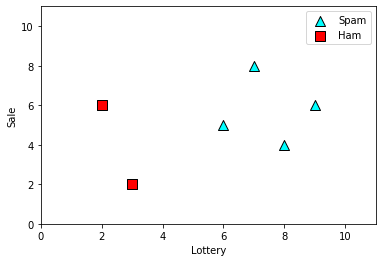

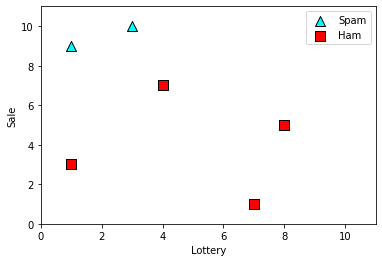

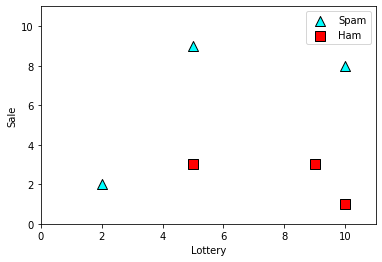

In [10]:
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[["Lottery", "Sale"]]
labels1 = first_batch["Spam"]

utils.plot_points(features1, labels1)
plt.show()

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[["Lottery", "Sale"]]
labels2 = second_batch["Spam"]

utils.plot_points(features2, labels2)
plt.show()

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[["Lottery", "Sale"]]
labels3 = third_batch["Spam"]

utils.plot_points(features3, labels3)
plt.show()

Next, we proceed to build our three weak learners. Fit a decision tree of depth 1 on each of these
subsets.

Weak learner 1 training accuracy: 1.0


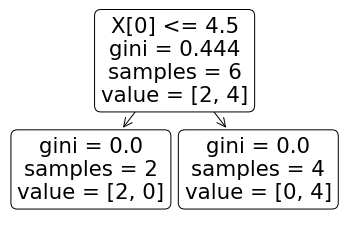

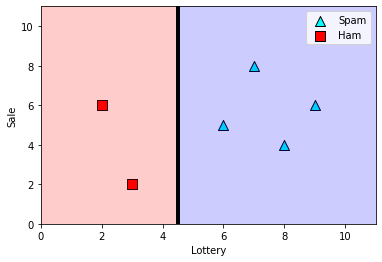

In [11]:
decision_tree_1 = DecisionTreeClassifier(max_depth=1, random_state=0)
decision_tree_1.fit(features1, labels1)
print(f"Weak learner 1 training accuracy: {decision_tree_1.score(features1, labels1)}")

tree.plot_tree(decision_tree_1, rounded=True)
plt.show()
utils.plot_model(features1, labels1, decision_tree_1)

Weak learner 2 training accuracy: 1.0


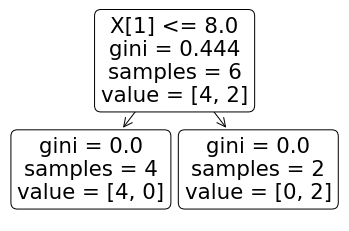

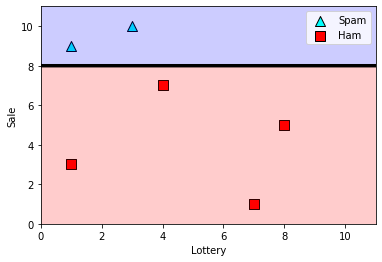

In [12]:
decision_tree_2 = DecisionTreeClassifier(max_depth=1, random_state=0)
decision_tree_2.fit(features2, labels2)
print(f"Weak learner 2 training accuracy: {decision_tree_2.score(features2, labels2)}")

tree.plot_tree(decision_tree_2, rounded=True)
plt.show()
utils.plot_model(features2, labels2, decision_tree_2)

Weak learner 3 training accuracy: 0.8333333333333334


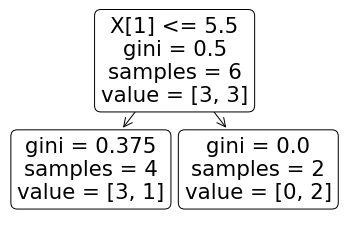

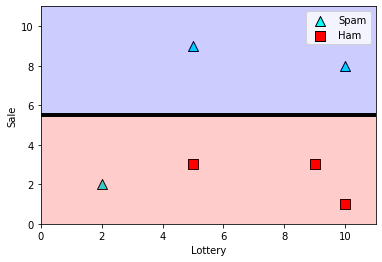

In [13]:
decision_tree_3 = DecisionTreeClassifier(max_depth=1, random_state=0)
decision_tree_3.fit(features3, labels3)
print(f"Weak learner 3 training accuracy: {decision_tree_3.score(features3, labels3)}")

tree.plot_tree(decision_tree_3, rounded=True)
plt.show()
utils.plot_model(features3, labels3, decision_tree_3)

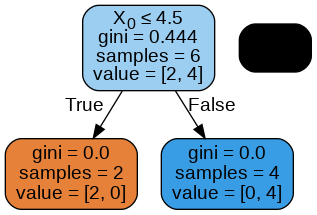

In [14]:
utils.display_tree(decision_tree_1)

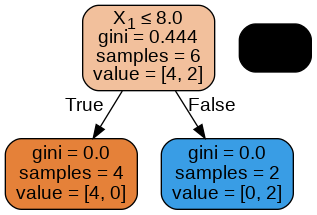

In [15]:
utils.display_tree(decision_tree_2)

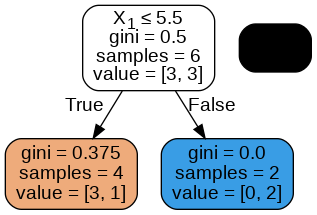

In [16]:
utils.display_tree(decision_tree_3)

We can combine these into a strong learner by voting. In other words, for any input, each of the weak
learners predicts a value of 0 or 1. The prediction the strong learner makes is the most common
output of the three.

Note that the random forest is a good classifier, because it classifies most of the points correctly,
but it allows a few mistakes in order to not overfit the data.

##Scikit-Learn's Random Forest

Let's train a random forest using Scikit-Learn.

In [18]:
# we want five weak learners
random_forest_classifier = RandomForestClassifier(n_estimators=5, max_depth=1, random_state=0)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

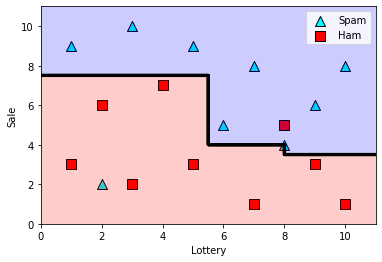

In [19]:
# let's plot the model
utils.plot_model(features, labels, random_forest_classifier)

Note how this model makes some mistakes but manages to find a good boundary, where the
spam emails are those with a lot of appearances of the words “lottery” and “sale” and the ham emails are those with not many appearances of these words.

Scikit-Learn also allows us to visualize and plot the individual weak learners.

****************************** Estimator ******************************


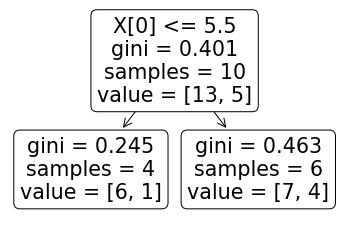

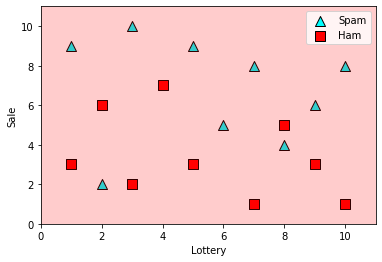

****************************** Estimator ******************************


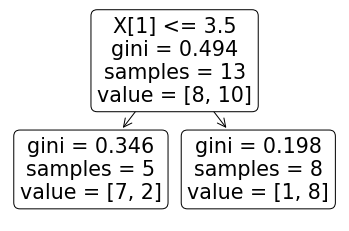

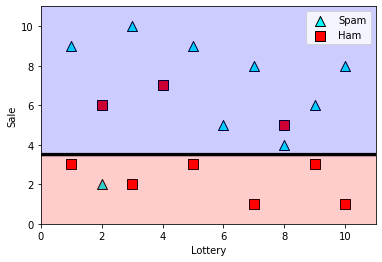

****************************** Estimator ******************************


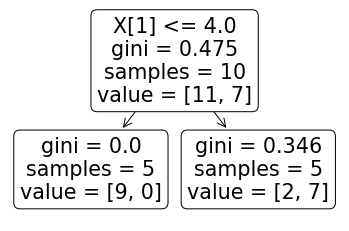

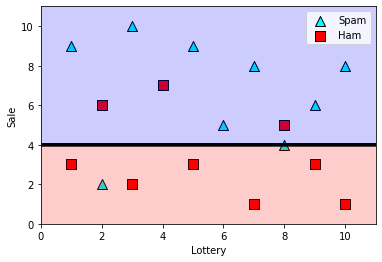

****************************** Estimator ******************************


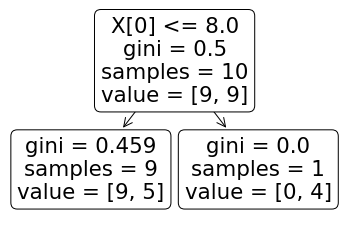

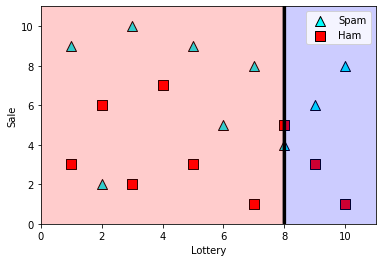

****************************** Estimator ******************************


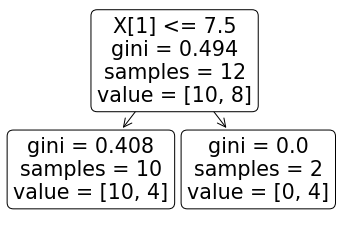

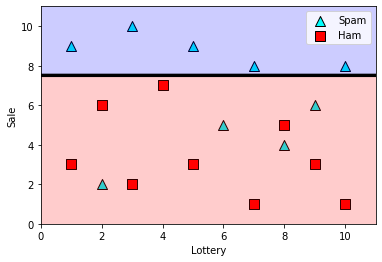

In [20]:
for d_tree in random_forest_classifier.estimators_:
  print("*" * 30, "Estimator", "*" * 30)
  tree.plot_tree(d_tree, rounded=True)
  plt.show()
  utils.plot_model(features, labels, d_tree)
  plt.show()

Notice that not all the weak learners
are useful.

Let's try retraining this model using decision trees of higher depth.

In [25]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

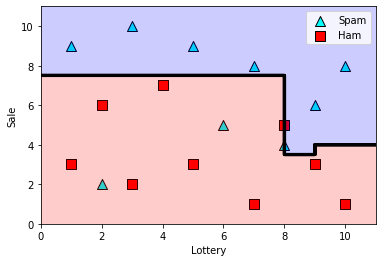

In [27]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


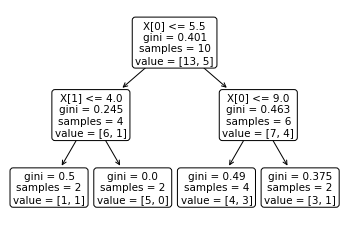

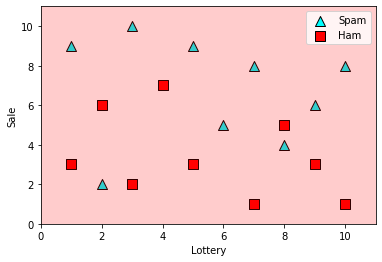

****************************** Estimator ******************************


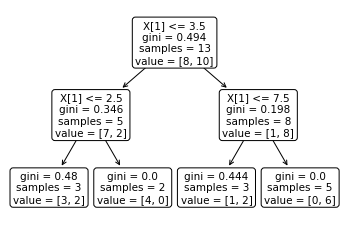

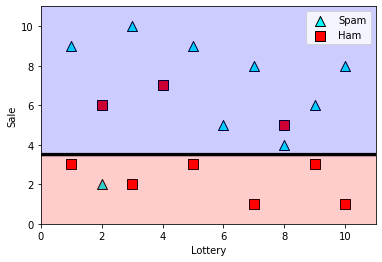

****************************** Estimator ******************************


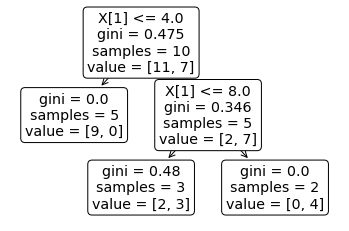

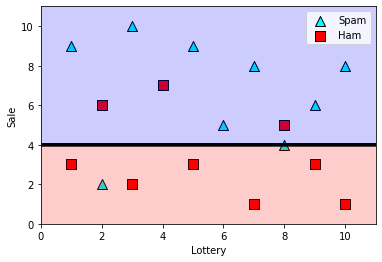

****************************** Estimator ******************************


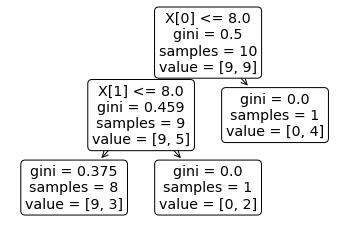

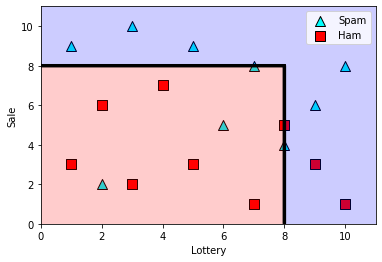

****************************** Estimator ******************************


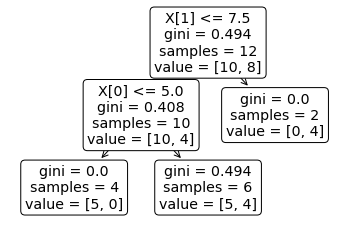

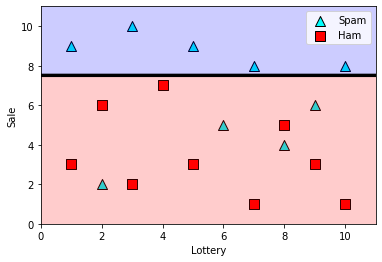

In [28]:
for d_tree in random_forest_classifier.estimators_:
  print("*" * 30, "Estimator", "*" * 30)
  tree.plot_tree(d_tree, rounded=True)
  plt.show()
  utils.plot_model(features, labels, d_tree)
  plt.show()

We notice that model start to overfit for depth 3.